In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/kaggle/input/insurance/insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='children', ylabel='count'>

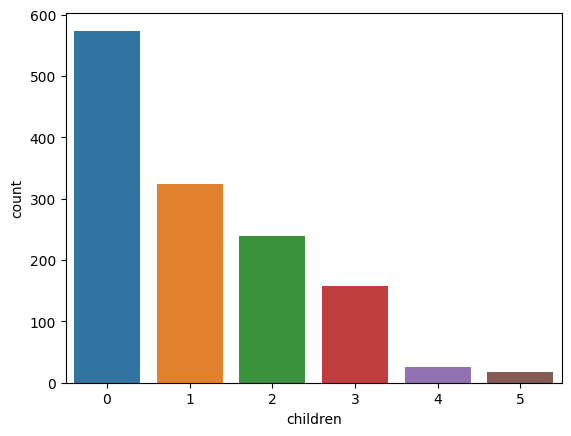

In [9]:
sns.countplot(x = df['children'])

In [10]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

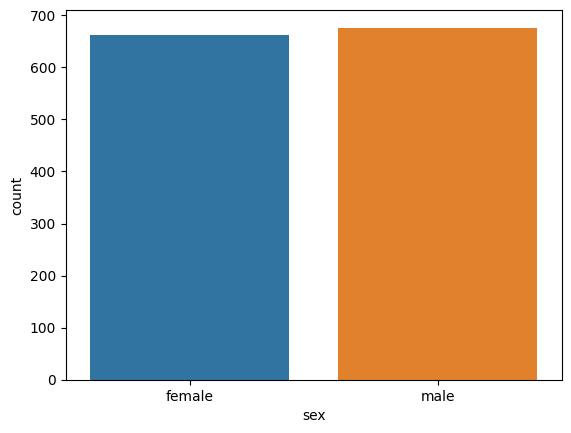

In [11]:
sns.countplot(x = df['sex'])

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df_clean = df.copy()

In [14]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df_clean.drop_duplicates(inplace = True)

In [16]:
df_clean.shape

(1337, 7)

In [17]:
df_clean['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [18]:
df_clean['sex'] = df_clean['sex'].map({'male':1,'female':0})

In [19]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [20]:
df_clean['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [21]:
df_clean['smoker'] = df_clean['smoker'].map({'no':0,'yes':1})

In [22]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [23]:
df_clean.rename(columns = {
    'sex':'is_femeal',
    'smoker' : 'is_smoker'
},inplace = True)

In [24]:
df_clean

,age,is_femeal,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [25]:
df_clean = pd.get_dummies( df_clean, columns = ['region'],drop_first = True)

In [26]:
df_clean

,age,is_femeal,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [27]:
df_clean.astype(int)

,age,is_femeal,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


In [28]:
df_clean['bmi_catagory'] = pd.cut(df_clean['bmi'],
                           bins = [0,18,22,27,float('inf')],
                           labels = ['underWaight','Normal','overWaight','obbs']
                           )

In [29]:
df_clean

,age,is_femeal,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catagory
0,19,0,27.900,0,1,16884.92400,False,False,True,obbs
1,18,1,33.770,1,0,1725.55230,False,True,False,obbs
2,28,1,33.000,3,0,4449.46200,False,True,False,obbs
3,33,1,22.705,0,0,21984.47061,True,False,False,overWaight
4,32,1,28.880,0,0,3866.85520,True,False,False,obbs
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False,obbs
1334,18,0,31.920,0,0,2205.98080,False,False,False,obbs
1335,18,0,36.850,0,0,1629.83350,False,True,False,obbs
1336,21,0,25.800,0,0,2007.94500,False,False,True,overWaight


In [30]:
df_clean = pd.get_dummies(df_clean,columns = ['bmi_catagory'],drop_first = True)

In [31]:
df_clean

,age,is_femeal,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catagory_Normal,bmi_catagory_overWaight,bmi_catagory_obbs
0,19,0,27.900,0,1,16884.92400,False,False,True,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False,False,False,True
2,28,1,33.000,3,0,4449.46200,False,True,False,False,False,True
3,33,1,22.705,0,0,21984.47061,True,False,False,False,True,False
4,32,1,28.880,0,0,3866.85520,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False,False,False,True
1334,18,0,31.920,0,0,2205.98080,False,False,False,False,False,True
1335,18,0,36.850,0,0,1629.83350,False,True,False,False,False,True
1336,21,0,25.800,0,0,2007.94500,False,False,True,False,True,False


In [32]:
df_clean = df_clean.astype(int)

In [33]:
df_clean

,age,is_femeal,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catagory_Normal,bmi_catagory_overWaight,bmi_catagory_obbs
0,19,0,27,0,1,16884,0,0,1,0,0,1
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,0,1,0
4,32,1,28,0,0,3866,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,0,0,1
1334,18,0,31,0,0,2205,0,0,0,0,0,1
1335,18,0,36,0,0,1629,0,1,0,0,0,1
1336,21,0,25,0,0,2007,0,0,1,0,1,0


In [34]:
df_clean.columns

Index(['age', 'is_femeal', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_catagory_Normal', 'bmi_catagory_overWaight', 'bmi_catagory_obbs'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_f = ['age','bmi','children']
df_clean[df_f] = scaler.fit_transform(df_clean[df_f])

In [36]:
df_clean

,age,is_femeal,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catagory_Normal,bmi_catagory_overWaight,bmi_catagory_obbs
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,0,1
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,0,1,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


In [37]:
df_clean['charges'].value_counts()


charges
11658    2
24915    2
4889     2
7160     2
1708     2
        ..
5910     1
11454    1
12730    1
26109    1
29141    1
Name: count, Length: 1284, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df_clean.drop('charges', axis = 1)
y = df_clean['charges']

In [40]:
print(X.shape)
print(y.shape)

(1337, 11)
(1337,)


In [41]:
df_clean.isnull().sum()

age                        0
is_femeal                  0
bmi                        0
children                   0
is_smoker                  0
charges                    0
region_northwest           0
region_southeast           0
region_southwest           0
bmi_catagory_Normal        0
bmi_catagory_overWaight    0
bmi_catagory_obbs          0
dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
X_train

,age,is_femeal,bmi,children,is_smoker,region_northwest,region_southeast,region_southwest,bmi_catagory_Normal,bmi_catagory_overWaight,bmi_catagory_obbs
1114,-1.155499,1,-1.008155,-0.909234,0,0,0,0,0,1,0
968,-1.297958,1,-0.844753,0.750351,0,0,0,0,0,1,0
599,0.910164,0,1.116072,0.750351,0,1,0,0,0,0,1
170,1.693691,1,1.769680,-0.909234,0,0,1,0,0,0,1
275,0.554015,0,-0.681351,0.750351,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1096,0.838934,0,0.625865,0.750351,1,0,0,0,0,0,1
1131,-0.870580,1,2.423288,0.750351,0,0,0,1,0,0,1
1295,-1.369188,1,-1.334960,-0.079442,0,0,0,1,1,0,0
861,-0.087053,0,-0.354547,1.580143,0,0,0,1,0,0,1


In [44]:
y_train

1114     2396
968      3279
599     33471
170     13405
275      9715
        ...  
1096    44641
1131     3693
1295     1964
861      7151
1127     5836
Name: charges, Length: 1069, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
sc = LinearRegression()

In [47]:
sc.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = sc.predict(X_test)

In [49]:
y_pred

array([ 8031.49203586,  5346.45329227, 14325.63556163, 31811.01735555,
        8870.05617   , 13080.40503902, 30335.83174568,  1229.49235866,
       10621.40550695, 11601.42961837, 10254.18377522, 33585.87390015,
       31153.27796908, 17064.90167892, 10766.81815484,  9780.3752899 ,
        4368.10612652, 31873.37137317,  2918.54364858,  5539.6542137 ,
        3840.29384545, 30815.09913686, 14507.33552038, 30847.60547467,
       31086.95906755,  5536.87184551, 35319.94929595, 36609.84621479,
       11588.67708432, 14161.12618527,  6851.00099555, 12801.79785622,
         307.09957058, 12468.51679139, 39116.21787182, 12438.91056919,
        4989.50748991,  3592.62069714, 30597.61428487,  9501.28304577,
        6745.41503105, 30066.95019197, 34669.06607128, 12525.46924886,
        7044.81406852,  2988.42437633,  6017.14667927,  9116.09129362,
        3814.59855702,  9260.14568955,  6884.70858051, 11679.61954578,
       31047.08354948,  3746.42234409, 10900.49775108,  9970.52228228,
      

In [50]:
y_test

900      8688
1064     5708
1256    11436
298     38746
237      4463
        ...  
534     13831
542     13887
760      3925
1284    47403
1285     8534
Name: charges, Length: 268, dtype: int64

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2 = r2_score(y_test,y_pred)
r2

0.8066593324145266